You are provided with a dataset containing information about various cars, including their specifications and selling prices. The task is to develop a machine learning model that can predict the selling price of a car based on its specifications. This predictive model will assist potential buyers and sellers in estimating the fair market value of a car.

Dataset contains these rows:

* Car_ID: A unique identifier for each car listing.
* Brand: The brand or manufacturer of the car (e.g., Toyota, Honda, Ford, etc.).
* Model: The model of the car (e.g., Camry, Civic, Mustang, etc.).
* Year: The manufacturing year of the car.
* Kilometers_Driven: The total kilometers driven by the car.
* Fuel_Type: The type of fuel used by the car (e.g., Petrol, Diesel, Electric, etc.).
* Transmission: The transmission type of the car (e.g., Manual, Automatic).
* Owner_Type: The number of previous owners of the car (e.g., First, Second, Third).
* Mileage: The fuel efficiency of the car in kilometers per liter.
* Engine: The engine capacity of the car in CC (Cubic Centimeters).
* Power: The maximum power output of the car in bhp (Brake Horsepower).
* Seats: The number of seats available in the car.
* Price: The selling price of the car in INR (Indian Rupees), which is the target variable to predict.

### Import the required libraries

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Read the data and form the dataframe

In [222]:
cars_df = pd.read_csv('./cars.csv')

In [223]:
cars_df.set_index('Car_ID', inplace = True)

### Dataframe inspections

In [224]:
cars_df.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Car_ID,,,,,,,,,,,,
1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [225]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 100
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              100 non-null    object
 1   Model              100 non-null    object
 2   Year               100 non-null    int64 
 3   Kilometers_Driven  100 non-null    int64 
 4   Fuel_Type          100 non-null    object
 5   Transmission       100 non-null    object
 6   Owner_Type         100 non-null    object
 7   Mileage            100 non-null    int64 
 8   Engine             100 non-null    int64 
 9   Power              100 non-null    int64 
 10  Seats              100 non-null    int64 
 11  Price              100 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 10.2+ KB


### Data Analysis

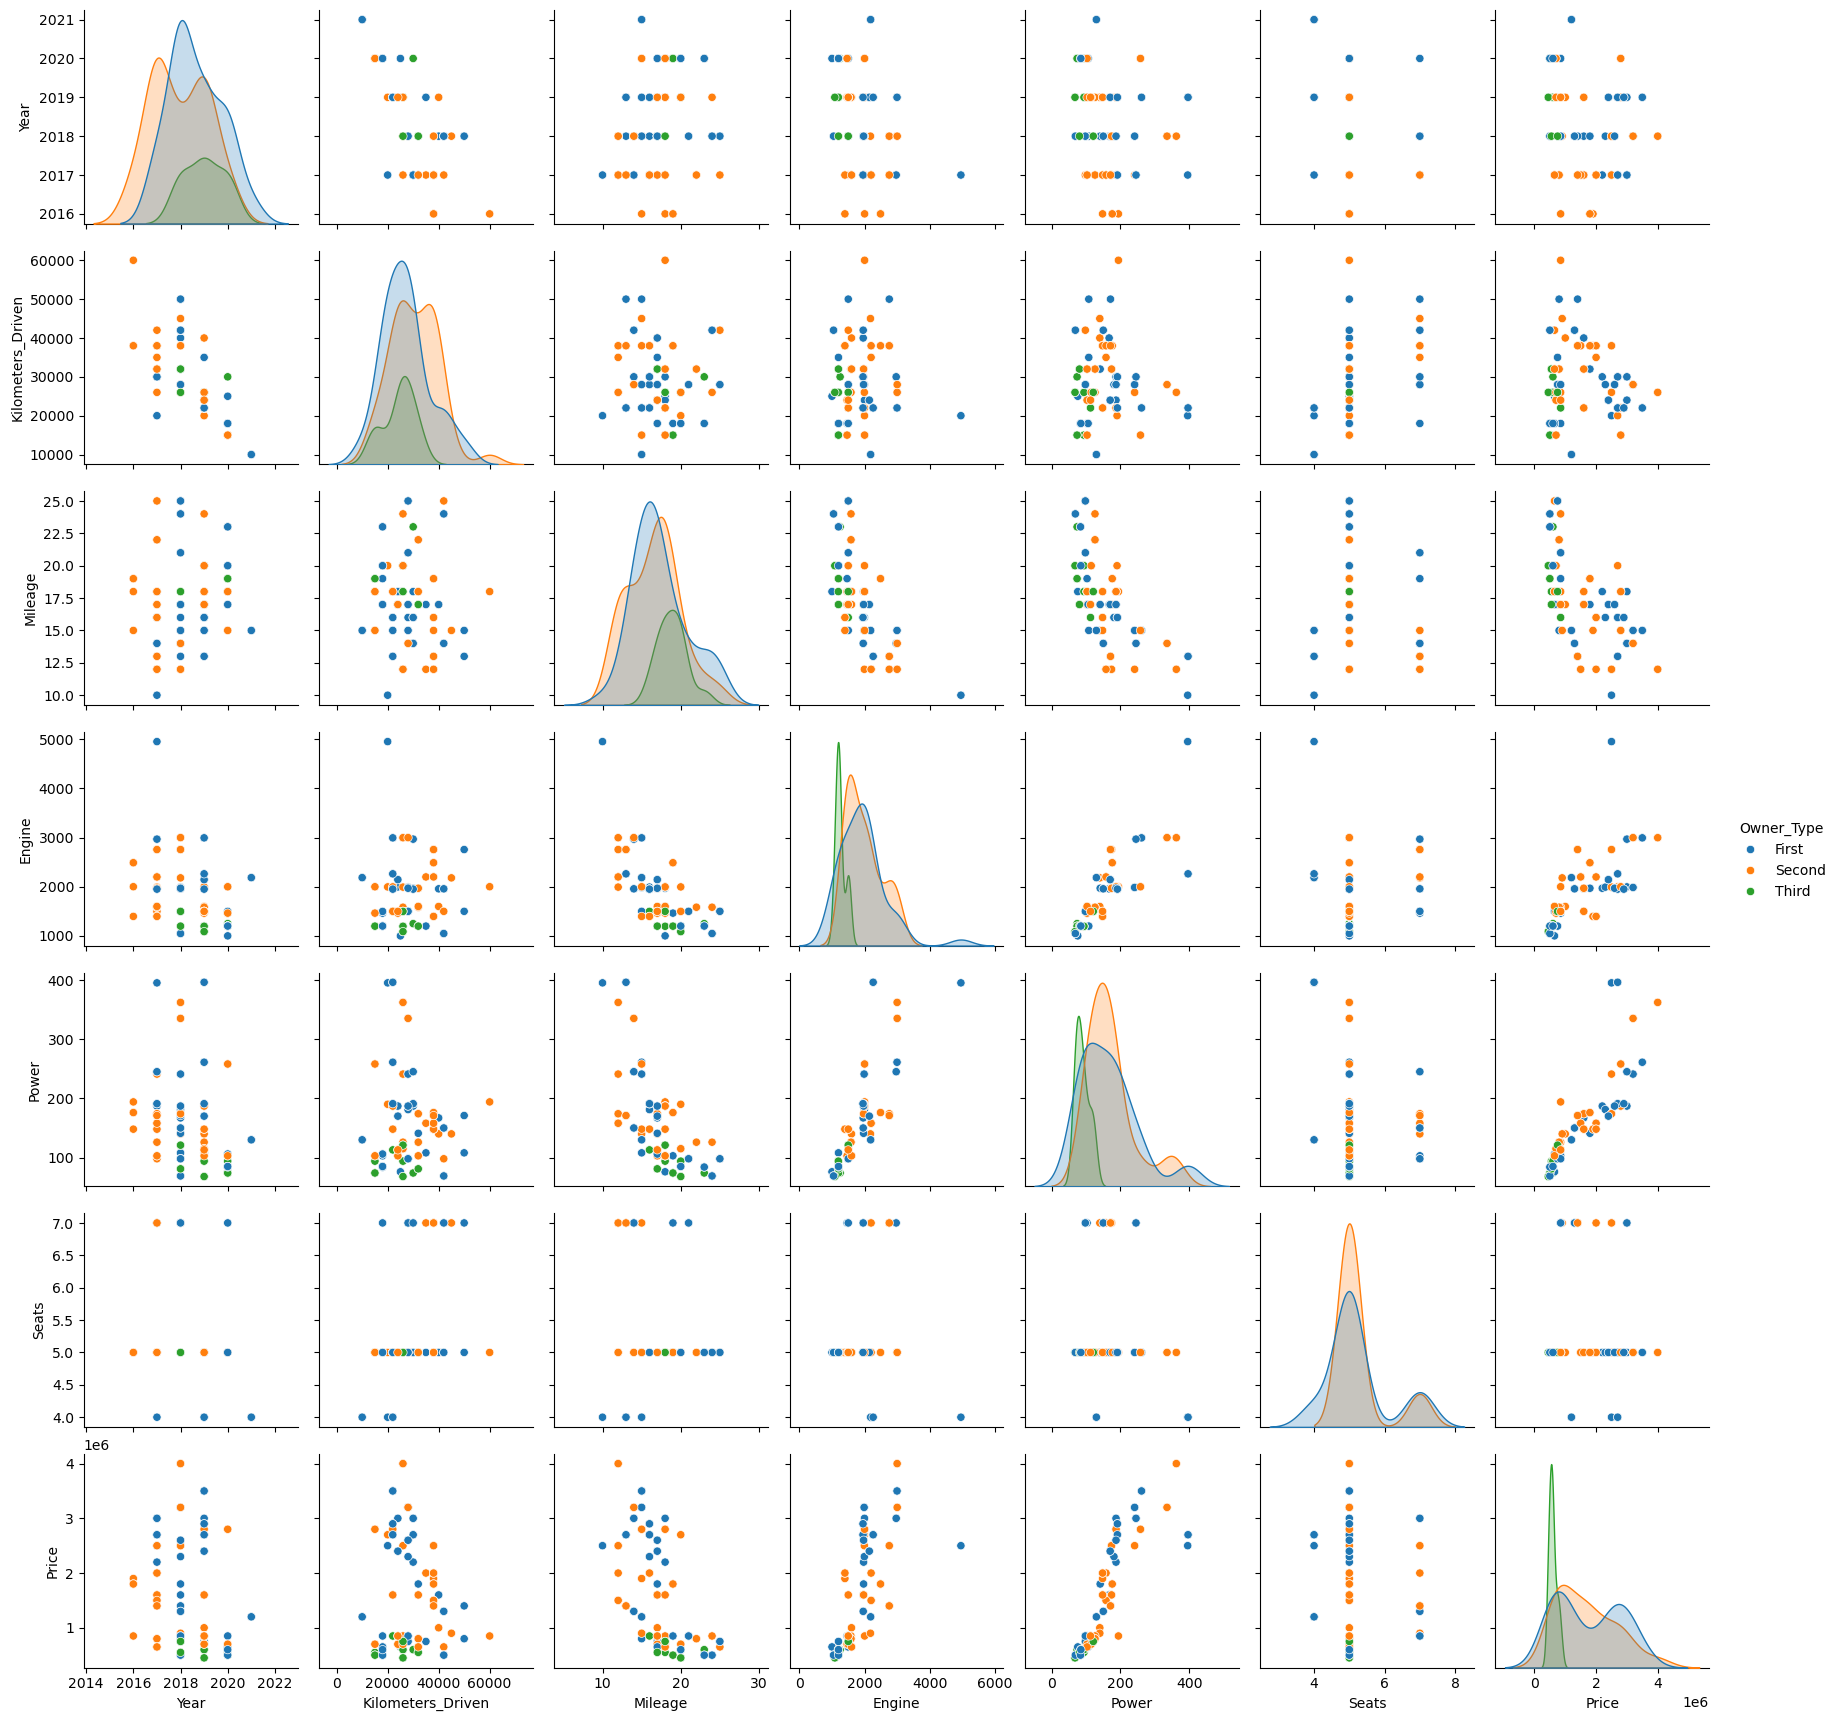

In [226]:
with warnings.catch_warnings():
  warnings.filterwarnings('ignore')
  sns.pairplot(cars_df, hue = 'Owner_Type')

It's evident from the above graphs that seats column doesn't have any relation with any other column. So we can remove this column.

In [227]:
cars_df['Car_Age'] = 2024 - cars_df['Year']
cars_df = cars_df.drop(columns=['Year', 'Seats'], axis = 1)
cars_df.head()

,Brand,Model,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Car_Age
Car_ID,,,,,,,,,,,
1,Toyota,Corolla,50000,Petrol,Manual,First,15,1498,108,800000,6
2,Honda,Civic,40000,Petrol,Automatic,Second,17,1597,140,1000000,5
3,Ford,Mustang,20000,Petrol,Automatic,First,10,4951,395,2500000,7
4,Maruti,Swift,30000,Diesel,Manual,Third,23,1248,74,600000,4
5,Hyundai,Sonata,60000,Diesel,Automatic,Second,18,1999,194,850000,8


#### Feature Encoding - Convert categorical columns into numerical.

In [228]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
le = LabelEncoder()
cars_df['Brand'] = le.fit_transform(cars_df['Brand'])
brand_mapping = dict(zip(le.classes_, range(len(le.classes_))))

cars_df['Model'] = le.fit_transform(cars_df['Model'])
model_mapping = dict(zip(le.classes_, range(len(le.classes_))))

#ordinal encoding of Fuel_Type, Transmission, Owner_Type 
oe = OrdinalEncoder(categories=[ ['Diesel', 'Petrol'], ['Automatic', 'Manual'], ['Third', 'Second', 'First']])
cars_df[['Fuel_Type', 'Transmission' ,'Owner_Type']] = oe.fit_transform(cars_df[['Fuel_Type', 'Transmission' ,'Owner_Type']]).astype(int)

cars_df.head()

,Brand,Model,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Car_Age
Car_ID,,,,,,,,,,,
1,9,15,50000,1,1,2,15,1498,108,800000,6
2,3,14,40000,1,0,1,17,1597,140,1000000,5
3,2,30,20000,1,0,2,10,4951,395,2500000,7
4,6,42,30000,0,1,0,23,1248,74,600000,4
5,4,41,60000,0,0,1,18,1999,194,850000,8


In [229]:
# mapping_array = []
# for key in model_mapping:
#     mapping_array.append({'text': key, 'value': model_mapping[key]})

# mapping_array

Let's put the Price which is our target column at the end in the dataframe

In [230]:
cols = cars_df.columns.tolist()
cols[-1], cols[-2] = cols[-2], cols[-1]
cars_df = cars_df[cols]
cars_df.head()

,Brand,Model,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Car_Age,Price
Car_ID,,,,,,,,,,,
1,9,15,50000,1,1,2,15,1498,108,6,800000
2,3,14,40000,1,0,1,17,1597,140,5,1000000
3,2,30,20000,1,0,2,10,4951,395,7,2500000
4,6,42,30000,0,1,0,23,1248,74,4,600000
5,4,41,60000,0,0,1,18,1999,194,8,850000


Let's take a look at the correlation

In [231]:
cars_df.corr()

,Brand,Model,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Car_Age,Price
Brand,1.000000,0.194702,0.082947,0.063037,0.187123,0.079183,0.086441,-0.166709,-0.335425,-0.110875,-0.354543
Model,0.194702,1.000000,0.011237,-0.059048,0.263721,-0.088050,0.130721,-0.074587,-0.153203,-0.090754,-0.292434
Kilometers_Driven,0.082947,0.011237,1.000000,-0.323762,0.030157,0.000560,-0.104437,0.112340,-0.026732,0.741176,-0.051104
Fuel_Type,0.063037,-0.059048,-0.323762,1.000000,0.066306,-0.323325,-0.060292,-0.258043,-0.008562,-0.252843,-0.180964
Transmission,0.187123,0.263721,0.030157,0.066306,1.000000,-0.097708,0.331015,-0.421374,-0.574349,-0.211993,-0.676484
Owner_Type,0.079183,-0.088050,0.000560,-0.323325,-0.097708,1.000000,-0.072823,0.248205,0.237857,-0.036276,0.301488
Mileage,0.086441,0.130721,-0.104437,-0.060292,0.331015,-0.072823,1.000000,-0.680949,-0.648894,-0.213177,-0.595252
Engine,-0.166709,-0.074587,0.112340,-0.258043,-0.421374,0.248205,-0.680949,1.000000,0.805709,0.355122,0.714465
Power,-0.335425,-0.153203,-0.026732,-0.008562,-0.574349,0.237857,-0.648894,0.805709,1.000000,0.249446,0.856620
Car_Age,-0.110875,-0.090754,0.741176,-0.252843,-0.211993,-0.036276,-0.213177,0.355122,0.249446,1.000000,0.232687


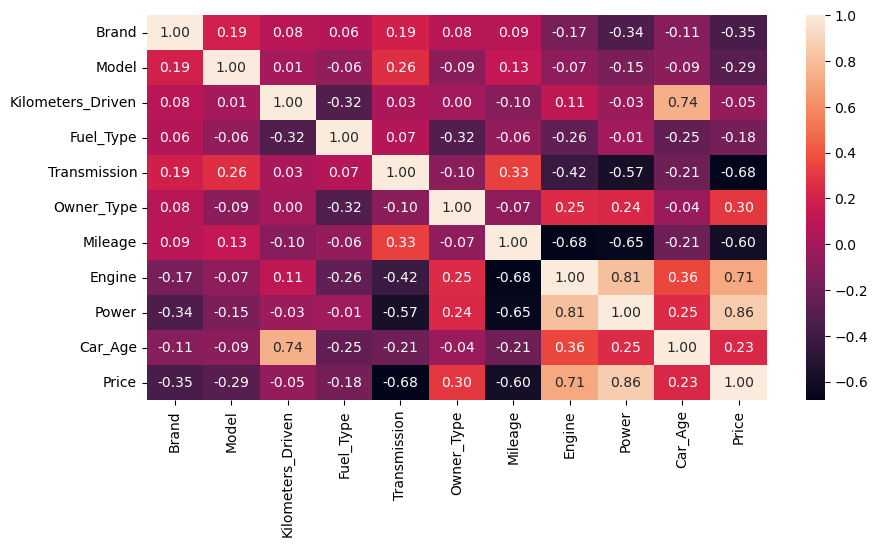

In [232]:
plt.figure(figsize = (10, 5))
sns.heatmap(cars_df.corr(), annot=True, fmt = '.2f', cmap='rocket', cbar=True)
plt.show()

From the above heatmap it shows that Kilometers_Drivn and Car_Age have high correlation so we can remove one of them. Similarly Engine and Power have high correlation so we can remove one of them.  
For now let's remove Kilometers_Driven and Engine

In [233]:
cars_df = cars_df.drop(columns=['Kilometers_Driven', 'Engine'], axis = 1)

### Feature Scaling of training data

In [234]:
X = cars_df.drop('Price', axis = 1)
y = cars_df['Price']

In [235]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [236]:
X = pd.DataFrame(X_scaled, columns=X.columns)
X.head()

,Brand,Model,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Car_Age
0,1.197594,-0.795891,0.960769,1.151339,1.002318,-0.671057,-0.654590,0.334681
1,-0.612372,-0.853690,0.960769,-0.868554,-0.450317,-0.063766,-0.236739,-0.523475
2,-0.914032,0.071093,0.960769,-0.868554,1.002318,-2.189286,3.093011,1.192836
3,0.292611,0.764680,-1.040833,1.151339,-1.902952,1.758109,-1.098556,-1.381631
4,-0.310711,0.706881,-1.040833,-0.868554,-0.450317,0.239880,0.468385,2.050992


### Train Test Split

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Model Training and Testing using XGBoost for regression

In [238]:
import xgboost as xgb

In [239]:
regressor = xgb.XGBRegressor(eval_metric='rmsle')

Let's run the GridSearchCV algorithm to find the best parameters

In [240]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [4, 5, 6], 'n_estimators': [500, 600, 700], 'learning_rate': [0.01, 0.015]}
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)
print("The best hyperparameters are ", search.best_params_)

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}


It's time to train the final XG regressor model using the best hyperparameters

In [241]:
regressor = xgb.XGBRegressor(max_depth=5, learning_rate=0.01, n_estimators=500, eval_metric='rmsle')
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [242]:
y_test_pred = regressor.predict(X_test)

In [243]:
from sklearn.metrics import mean_squared_log_error, r2_score
RMSLE = np.sqrt(mean_squared_log_error(y_test, y_test_pred))
RMSLE

0.12004408510623799

In [244]:
r2_score(y_test, y_test_pred)

0.972546563712873

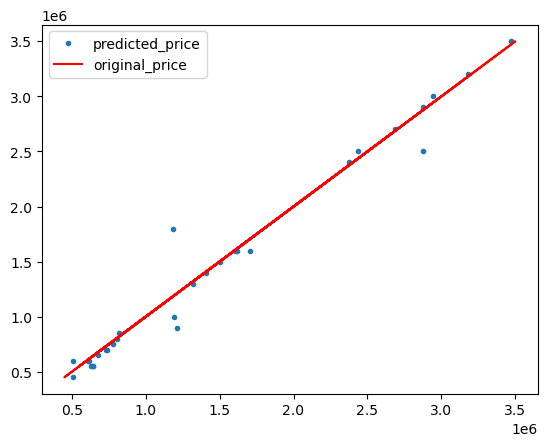

In [245]:
plt.plot(y_test_pred, y_test.values, '.', label='predicted_price')
plt.plot(y_test.values, y_test.values, 'r', label='original_price')
plt.legend()

In [246]:
import pickle
model_pkl_file = "second_hand_car_price_model.pkl"
with open(model_pkl_file, 'wb') as file:
    pickle.dump(regressor, file)